In [1]:
import pandas as pd

# Charger fichiers CSV
PBC_APL_ML_1 = pd.read_csv("PBC_APL_all_features_noyau_1_2.csv")
#PBC_APL_ML_1 = PBC_APL_ML_1[~PBC_APL_ML_1['Classe'].isin(['giant thrombocyte','lymphocyte, variant','plasma cells','promonocyte'])]

# Nettoyage des données

In [2]:
import pandas as pd

# Supposons que votre dataframe s'appelle df
cols_to_drop = ["Nom", "Numéro", "Chemin image", "dataset", "Boîte encadrante", "Centre"]
PBC_APL_ML_1 = PBC_APL_ML_1.drop(columns=cols_to_drop)


In [3]:
PBC_APL_ML_1

Aire noyau  Périmètre noyau  Largeur du rectangle minimal  \
0         10011.0       669.724963                           121   
1          8676.0       599.020382                           119   
2         14337.0       941.163564                           140   
3         24265.0      1262.626550                           254   
4         30884.0      2314.819551                           246   
...           ...              ...                           ...   
26645      5229.0       629.103643                           100   
26646      5670.0       796.186904                           119   
26647      5376.0       636.595021                           106   
26648      7008.0       677.310750                           135   
26649      7152.0      1294.337229                            95   

       Hauteur du rectangle minimal  Rayon noyau  Petit axe noyau  \
0                               116    56.449980       111.758655   
1                               104    52.551466        98.626314   
2                               137    67.554488       133.059807   
3                               192    87.885092       143.488341   
4                               233    99.149798       217.193332   
...                             ...          ...              ...   
26645                           104    40.797578        71.804672   
26646                            96    42.483138        81.115843   
26647                            88    41.367064        71.269801   
26648                            95    47.230453        73.762191   
26649                           131    47.713230        97.429076   

       Grand axe noyau  Excentricité noyau  Périmètre convexe noyau  \
0           116.225370            0.274565                  10828.0   
1           113.898563            0.500194                   9673.0   
2           145.801369            0.408831                  17986.0   
3           277.959096            0.856455                  37657.0   
4           294.703293            0.675904                  52296.0   
...                ...                 ...                      ...   
26645       129.869271            0.833248                   8933.0   
26646       135.815507            0.802055                  10175.0   
26647       123.874775            0.817916                   6694.0   
26648       148.221739            0.867379                   8749.0   
26649       137.353978            0.704878                  10959.0   

       Solidité noyau      Classe  
0            0.924547    basophil  
1            0.896930    basophil  
2            0.797120    basophil  
3            0.644369    basophil  
4            0.590561    basophil  
...               ...         ...  
26645        0.585358  neutrophil  
26646        0.557248  neutrophil  
26647        0.803107  neutrophil  
26648        0.801006  neutrophil  
26649        0.652614  neutrophil  

[26650 rows x 11 columns]

In [4]:
# Lister les classes uniques présentes dans le dataframe original (avant transformation)
unique_classes = PBC_APL_ML_1["Classe"].unique()
unique_classes

array(['basophil', 'blast, no lineage spec', 'neutrophil', 'eosinophil',
       'erythroblast', 'giant thrombocyte', 'lymphocyte', 'monocyte',
       'ig', 'plasma cells', 'promonocyte', 'lymphocyte, variant',
       'platelet'], dtype=object)

In [5]:
# Calculer la répartition du nombre d'images par classe dans le dataframe original
class_distribution = PBC_APL_ML_1["Classe"].value_counts()
class_distribution

Classe
neutrophil                4842
lymphocyte                4082
ig                        3515
eosinophil                3185
blast, no lineage spec    2547
monocyte                  2410
platelet                  2345
erythroblast              1959
basophil                  1261
lymphocyte, variant        366
giant thrombocyte           58
plasma cells                46
promonocyte                 34
Name: count, dtype: int64

In [6]:
numerical_features = PBC_APL_ML_1.select_dtypes(include=['float64', 'int64']).columns

In [7]:
Q1 = PBC_APL_ML_1[numerical_features].quantile(0.25)
Q3 = PBC_APL_ML_1[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des lignes avec des valeurs aberrantes
outliers = (PBC_APL_ML_1[numerical_features] < lower_bound) | (PBC_APL_ML_1[numerical_features] > upper_bound)

# Calcul du nombre total de valeurs aberrantes pour chaque caractéristique
outliers_count = outliers.sum(axis=0)

# Suppression des lignes contenant des valeurs aberrantes
PBC_APL_ML_1 = PBC_APL_ML_1[~(outliers.any(axis=1))]

In [8]:
PBC_APL_ML_1

Aire noyau  Périmètre noyau  Largeur du rectangle minimal  \
0         10011.0       669.724963                           121   
1          8676.0       599.020382                           119   
2         14337.0       941.163564                           140   
7         15973.0       530.765548                           159   
11        13851.0      2015.907863                           166   
...           ...              ...                           ...   
26645      5229.0       629.103643                           100   
26646      5670.0       796.186904                           119   
26647      5376.0       636.595021                           106   
26648      7008.0       677.310750                           135   
26649      7152.0      1294.337229                            95   

       Hauteur du rectangle minimal  Rayon noyau  Petit axe noyau  \
0                               116    56.449980       111.758655   
1                               104    52.551466        98.626314   
2                               137    67.554488       133.059807   
7                               149    71.304725       126.478654   
11                              140    66.399625       127.022722   
...                             ...          ...              ...   
26645                           104    40.797578        71.804672   
26646                            96    42.483138        81.115843   
26647                            88    41.367064        71.269801   
26648                            95    47.230453        73.762191   
26649                           131    47.713230        97.429076   

       Grand axe noyau  Excentricité noyau  Périmètre convexe noyau  \
0           116.225370            0.274565                  10828.0   
1           113.898563            0.500194                   9673.0   
2           145.801369            0.408831                  17986.0   
7           164.662249            0.640318                  17392.0   
11          171.557877            0.672158                  19497.0   
...                ...                 ...                      ...   
26645       129.869271            0.833248                   8933.0   
26646       135.815507            0.802055                  10175.0   
26647       123.874775            0.817916                   6694.0   
26648       148.221739            0.867379                   8749.0   
26649       137.353978            0.704878                  10959.0   

       Solidité noyau      Classe  
0            0.924547    basophil  
1            0.896930    basophil  
2            0.797120    basophil  
7            0.918411    basophil  
11           0.710417    basophil  
...               ...         ...  
26645        0.585358  neutrophil  
26646        0.557248  neutrophil  
26647        0.803107  neutrophil  
26648        0.801006  neutrophil  
26649        0.652614  neutrophil  

[23270 rows x 11 columns]

# Standardisation

In [9]:
from sklearn.preprocessing import StandardScaler

features_to_standardize = [
    "Aire noyau", "Périmètre noyau", "Largeur du rectangle minimal",
    "Hauteur du rectangle minimal", "Rayon noyau", "Petit axe noyau",
    "Grand axe noyau", "Excentricité noyau", "Périmètre convexe noyau", "Solidité noyau"
]

scaler = StandardScaler()
PBC_APL_ML_1.loc[:, features_to_standardize] = scaler.fit_transform(PBC_APL_ML_1[features_to_standardize])


In [10]:
PBC_APL_ML_1.head(1)

Aire noyau  Périmètre noyau  Largeur du rectangle minimal  \
0    0.218471        -0.418042                      0.198611   

   Hauteur du rectangle minimal  Rayon noyau  Petit axe noyau  \
0                      0.051551     0.358638         0.527174   

   Grand axe noyau  Excentricité noyau  Périmètre convexe noyau  \
0        -0.230624           -1.527446                -0.075415   

   Solidité noyau    Classe  
0        0.957772  basophil

# Séparation des données en ensembles d'entraînement, validation et test

In [11]:
from sklearn.model_selection import train_test_split

# Supposons que vous utilisez 70% pour l'entraînement, 15% pour la validation et 15% pour le test
X = PBC_APL_ML_1.drop(columns=["Classe"])
y = PBC_APL_ML_1["Classe"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


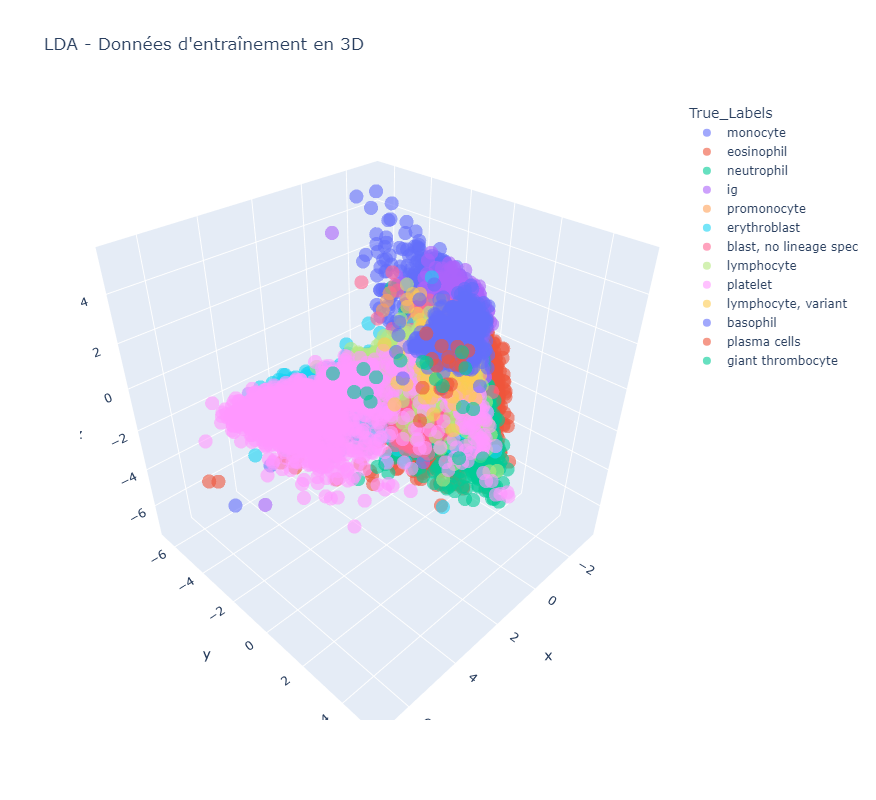

In [12]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialisation et ajustement du modèle LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_encoded)

# Transformation des données en utilisant le modèle LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Création d'un DataFrame pour Plotly
df = pd.DataFrame({
    'x': X_train_lda[:, 0],
    'y': X_train_lda[:, 1],
    'z': X_train_lda[:, 2],
    'True_Labels': label_encoder.inverse_transform(y_train_encoded)
})

# Création du graphique interactif avec Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z', color='True_Labels', title='LDA - Données d\'entraînement en 3D', size_max=3, opacity=0.6)
fig.update_layout(scene=dict(aspectmode="cube"), width=800, height=800) 

# Affichage du graphique interactif
fig.show()



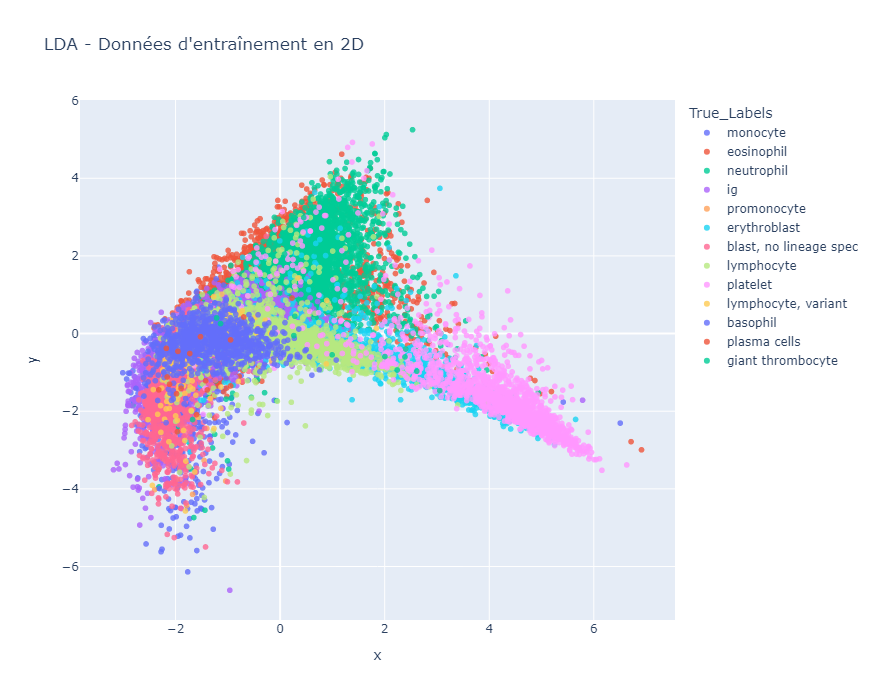

In [13]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialisation et ajustement du modèle LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_encoded)

# Transformation des données en utilisant le modèle LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Création d'un DataFrame pour Plotly
df = pd.DataFrame({
    'x': X_train_lda[:, 0],
    'y': X_train_lda[:, 1],
    'True_Labels': label_encoder.inverse_transform(y_train_encoded)
})

# Création du graphique interactif avec Plotly en 2D
fig = px.scatter(df, x='x', y='y', color='True_Labels', title='LDA - Données d\'entraînement en 2D', opacity=0.8)
fig.update_layout(width=900, height=700) 

# Affichage du graphique interactif
fig.show()


# Sur-échantillonnage avec SMOTE sur l'ensemble d'entraînement (pas concluant)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# Encodage à chaud (One-Hot Encoding)

Cette étape est effectuée séparément sur les ensembles d'entraînement, de validation et de test pour éviter toute fuite de données.

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
y_train_encoded = ohe.fit_transform(y_train_resampled.values.reshape(-1, 1))
y_val_encoded = ohe.transform(y_val.values.reshape(-1, 1))
y_test_encoded = ohe.transform(y_test.values.reshape(-1, 1))


# Régression logistique et RandomForest

Régression logistique

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Création et entraînement du modèle
logistic_model = LogisticRegression(max_iter=10000)  # max_iter est augmenté pour assurer la convergence
logistic_model.fit(X_train_resampled, y_train_resampled)

# Prédiction et évaluation sur l'ensemble de validation
y_val_pred = logistic_model.predict(X_val)
print(classification_report(y_val, y_val_pred))


                        precision    recall  f1-score   support

              basophil       0.33      0.20      0.25       167
blast, no lineage spec       0.63      0.78      0.70       252
            eosinophil       0.72      0.64      0.68       476
          erythroblast       0.63      0.31      0.41       276
     giant thrombocyte       0.00      0.00      0.00         9
                    ig       0.54      0.55      0.55       459
            lymphocyte       0.57      0.78      0.66       519
   lymphocyte, variant       0.00      0.00      0.00        45
              monocyte       0.58      0.50      0.54       300
            neutrophil       0.79      0.86      0.82       654
          plasma cells       0.00      0.00      0.00         3
              platelet       0.75      0.83      0.79       327
           promonocyte       0.00      0.00      0.00         3

              accuracy                           0.65      3490
             macro avg       0.43     

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Forêt aléatoire

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Prédiction et évaluation sur l'ensemble de validation
y_val_pred_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_val_pred_rf))


                        precision    recall  f1-score   support

              basophil       0.41      0.46      0.43       167
blast, no lineage spec       0.65      0.81      0.72       252
            eosinophil       0.75      0.76      0.76       476
          erythroblast       0.67      0.50      0.57       276
     giant thrombocyte       0.00      0.00      0.00         9
                    ig       0.63      0.56      0.59       459
            lymphocyte       0.68      0.79      0.73       519
   lymphocyte, variant       0.00      0.00      0.00        45
              monocyte       0.57      0.57      0.57       300
            neutrophil       0.84      0.87      0.85       654
          plasma cells       0.00      0.00      0.00         3
              platelet       0.86      0.80      0.83       327
           promonocyte       0.00      0.00      0.00         3

              accuracy                           0.70      3490
             macro avg       0.47     

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Optimisation des hyperparamètres pour la Forêt Aléatoire:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle de forêt aléatoire
rf = RandomForestClassifier()

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser la recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajuster le modèle avec les combinaisons d'hyperparamètres
grid_search.fit(X_train_resampled, y_train_resampled)

# Récupérer le meilleur modèle
best_rf = grid_search.best_estimator_

# Évaluer les performances du meilleur modèle sur l'ensemble de validation
y_val_pred = best_rf.predict(X_val)
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
# Afficher les meilleurs hyperparamètres
best_parameters = {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
print("Best Hyperparameters:", best_parameters)


Formation du Modèle Final

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Créez le modèle avec les meilleurs hyperparamètres
final_rf = RandomForestClassifier(**best_parameters, random_state=42)

# Formez le modèle sur l'ensemble complet des données d'entraînement
final_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)

Prédiction sur l'ensemble de test

In [19]:
# Prédisez les labels pour l'ensemble de test
y_test_pred = final_rf.predict(X_test)


Évaluation des performances du modèle

In [20]:
from sklearn.metrics import classification_report

# Affichez le rapport de classification
print(classification_report(y_test, y_test_pred))


                        precision    recall  f1-score   support

              basophil       0.42      0.46      0.44       167
blast, no lineage spec       0.64      0.76      0.69       266
            eosinophil       0.74      0.71      0.72       459
          erythroblast       0.66      0.53      0.58       272
     giant thrombocyte       0.00      0.00      0.00         4
                    ig       0.59      0.54      0.56       445
            lymphocyte       0.67      0.77      0.72       502
   lymphocyte, variant       0.43      0.06      0.10        51
              monocyte       0.54      0.56      0.55       297
            neutrophil       0.84      0.86      0.85       641
          plasma cells       0.00      0.00      0.00         4
              platelet       0.88      0.86      0.87       380
           promonocyte       0.00      0.00      0.00         3

              accuracy                           0.69      3491
             macro avg       0.49     

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matrice de confusion

In [21]:
from sklearn.metrics import confusion_matrix

# Calculez la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Affichez la matrice de confusion
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 77   8  10   0   0  45  18   0   9   0   0   0   0]
 [  2 201   4   0   0  13  13   1  29   1   1   0   1]
 [ 17   6 326   8   0  27  10   0   7  53   0   5   0]
 [  3   4  11 143   0   7  65   0   2   8   0  29   0]
 [  0   1   0   0   0   0   0   0   0   0   0   3   0]
 [ 48  33  30  11   0 239  13   1  45  24   0   1   0]
 [ 23  12   8  24   0  10 387   1  24  10   0   3   0]
 [  1   7   1   0   0   0  26   3  13   0   0   0   0]
 [ 11  32  22   0   0  48  16   1 165   2   0   0   0]
 [  2   6  26   5   0  17  18   0   9 553   0   5   0]
 [  0   4   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4  27   0   0  10   0   4   8   0 327   0]
 [  0   2   0   0   0   0   0   0   1   0   0   0   0]]


# XGBoost

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier


Entrainement du modèle

In [20]:
from sklearn.preprocessing import LabelEncoder

# Créez une instance de l'encodeur
label_encoder = LabelEncoder()

# Adaptez et transformez les labels d'entraînement
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Transformez également les labels de test (nous en aurons besoin plus tard)
y_test_encoded = label_encoder.transform(y_test)


In [24]:
clf_xgb = XGBClassifier(objective='multi:softmax', num_class=len(set(y_train_encoded)), random_state=42)
clf_xgb.fit(X_train_resampled, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...)

Evaluation des performances du modèle sur l'ensemble de test

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédire les classes pour l'ensemble de test
y_pred_encoded = clf_xgb.predict(X_test)

# Convertir les prédictions encodées en labels de classe d'origine
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print(confusion_matrix(y_test, y_pred))


                        precision    recall  f1-score   support

              basophil       0.49      0.54      0.52       168
blast, no lineage spec       0.66      0.77      0.71       255
            eosinophil       0.77      0.74      0.76       475
          erythroblast       0.64      0.50      0.56       282
                    ig       0.63      0.58      0.60       467
            lymphocyte       0.67      0.79      0.73       490
              monocyte       0.56      0.60      0.58       287
            neutrophil       0.86      0.83      0.85       660
              platelet       0.89      0.85      0.87       342

              accuracy                           0.71      3426
             macro avg       0.69      0.69      0.69      3426
          weighted avg       0.72      0.71      0.71      3426

[[ 91   3  10   2  30  24   8   0   0]
 [  3 196   6   3   5  13  28   1   0]
 [ 20   9 351   5  27   8  10  41   4]
 [  6   4   8 141  18  65   4   9  27]
 [ 36  30

Optimisation des hyperparamètres

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb

# 1. Encodage des étiquettes
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)

# 2. Définition de l'espace des hyperparamètres
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.7, 0.3),
    'subsample': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3)
}

clf_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=14, random_state=42)

# Initialisation de RandomizedSearchCV
random_search = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Ajuster le modèle
random_search.fit(X_train_resampled, y_train_resampled_encoded)

# Récupérer le meilleur modèle
best_xgb = random_search.best_estimator_

# Pour prédire sur de nouvelles données ou évaluer le modèle, n'oubliez pas de transformer également les étiquettes de la manière suivante:
# y_test_encoded = label_encoder.transform(y_test)
# best_xgb.predict(X_test)


In [ ]:
print(random_search.best_params_)


In [ ]:
print(random_search.best_score_)


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb

# 1. Encodage des étiquettes
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)

In [24]:
best_parameters = {'colsample_bytree': 0.8199582915145766, 'gamma': 0.013999698964084628, 'learning_rate': 0.10737555188414592, 'max_depth': 9, 'n_estimators': 289, 'subsample': 0.7271819303598462}


In [25]:
# Créez le modèle avec les meilleurs hyperparamètres
best_xgb = xgb.XGBClassifier(**best_parameters, random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled_encoded)
y_pred_encoded = best_xgb.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score
y_test_encoded = label_encoder.transform(y_test)
accuracy_test = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy on test data: {accuracy_test*100:.2f}%")


Accuracy on test data: 70.95%


In [27]:
feature_importance = best_xgb.feature_importances_
feature_importance

array([0.20036861, 0.10813802, 0.05198318, 0.05358107, 0.14226073,
       0.07690137, 0.13924918, 0.05628468, 0.09295069, 0.07828244],
      dtype=float32)

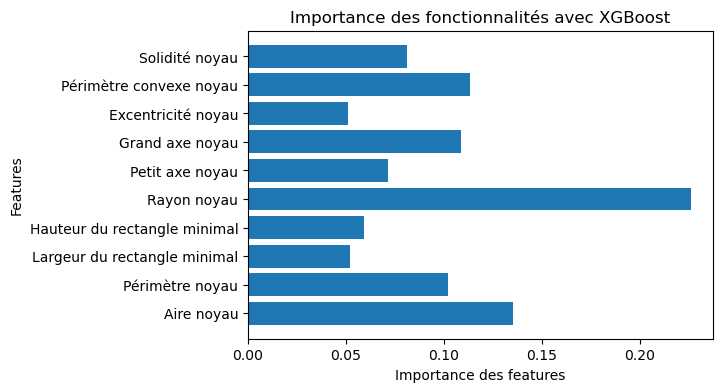

In [172]:
import matplotlib.pyplot as plt
feature_names = [
    "Aire noyau", "Périmètre noyau", "Largeur du rectangle minimal",
    "Hauteur du rectangle minimal", "Rayon noyau", "Petit axe noyau",
    "Grand axe noyau", "Excentricité noyau", "Périmètre convexe noyau", "Solidité noyau"
]
plt.figure(figsize=(6, 4))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Importance des features')
plt.ylabel('Features')
plt.title('Importance des fonctionnalités avec XGBoost')
plt.show()

In [29]:
# Pour prédire sur de nouvelles données ou évaluer le modèle, n'oubliez pas de transformer également les étiquettes de la manière suivante:
y_test_encoded = label_encoder.transform(y_test)
best_xgb.predict(X_test)

array([11,  3,  6, ...,  2, 11,  1], dtype=int64)

In [30]:
y_pred_encoded = best_xgb.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(cm)

# Score de précision
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision : {accuracy*100:.2f}%")

# Rapport de classification (inclut la précision, le rappel, le score F1 pour chaque classe)
report = classification_report(y_test, y_pred)
print("\nRapport de classification :")
print(report)


Matrice de confusion :
[[ 86   3   8   1   0  41  21   0   7   0   0   0   0]
 [  3 207   3   0   0  12  12   0  27   2   0   0   0]
 [ 10   8 352   5   0  21   9   0   4  47   0   3   0]
 [  4   4   7 140   0   8  68   0   2   9   0  30   0]
 [  0   0   0   1   0   0   1   0   0   0   0   2   0]
 [ 51  30  26   9   0 245  19   0  40  25   0   0   0]
 [ 19  14   5  18   0  10 399   3  20   8   0   6   0]
 [  1   6   1   0   0   2  28   0  13   0   0   0   0]
 [ 14  32  16   0   0  50  11   1 169   3   0   1   0]
 [  2   6  27   8   0  15  15   0  11 553   0   4   0]
 [  0   4   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  34   0   0   6   0   2  11   0 326   0]
 [  0   2   0   0   0   0   0   0   1   0   0   0   0]]

Précision : 70.95%

Rapport de classification :
                        precision    recall  f1-score   support

              basophil       0.45      0.51      0.48       167
blast, no lineage spec       0.66      0.78      0.71       266
            eosinop

C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\C. MATTEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
